In [1]:
# Add a command to produce plots directly below cells.
%matplotlib inline
# Import required packages
import numpy as np
import os
# Import xarray and glob for data analysis.
import xarray as xr
from glob import glob
# Dask for processing
import dask as da

os.chdir("/home/561/gp8431")
from climate import StandardGrid
from climate import Projection

import matplotlib.pyplot as plt

# Change working directory.
os.chdir("/scratch/w40/gp8431/run")

In [12]:
# Make an era plot of ucomp
files_u = glob('/g/data/rt52/era5/pressure-levels/monthly-averaged/u/*/*')
files_u.sort()
era_all_u = xr.open_mfdataset(files_u, combine='by_coords').u #.rename({"t":"temp"})

In [3]:
era_u_oct_2019 = era_all_u.sel(time=slice('2019-10-01','2019-10-31'))#.groupby('time.month')
era_u_oct_2019 = era_u_oct_2019.rename({"latitude":"lat", "longitude":"lon", "level":"pfull"})
era_u_oct_2019 = StandardGrid(era_u_oct_2019, lon_name='lon', lat_name='lat')

In [4]:
fig_era_u_oct_2019 = plt.figure(figsize=(16,16))

<Figure size 1152x1152 with 0 Axes>

In [5]:
era_u_oct_2019_mean = era_u_oct_2019.mean('lon')

In [6]:
era_u_oct_2019_mean = era_u_oct_2019_mean.squeeze()
era_u_oct_2019_mean.load()

<xarray.DataArray 'u' (pfull: 37, lat: 721)>
array([[-8.43048096e-04, -6.06133528e-02, -9.56590623e-02, ...,
         1.68035173e+00,  9.37988877e-01, -8.43048096e-04],
       [ 7.34329224e-04, -2.91131856e-03,  8.22973177e-02, ...,
         1.48598683e+00,  8.05510521e-01,  7.34329224e-04],
       [ 7.34329224e-04,  1.55139446e-01,  3.12875479e-01, ...,
         1.27814698e+00,  6.76043928e-01,  7.34329224e-04],
       ...,
       [ 7.34329224e-04,  2.04297360e-02, -7.79090375e-02, ...,
        -1.58370152e-01, -1.15566954e-01,  7.34329224e-04],
       [-8.43048096e-04,  2.52233185e-02, -7.90763199e-02, ...,
        -2.00454503e-01, -1.38179928e-01, -8.43048096e-04],
       [ 7.34329224e-04,  3.41653600e-02, -9.24311429e-02, ...,
        -2.02976927e-01, -1.15020029e-01,  7.34329224e-04]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -90.0 -89.75 -89.5 -89.25 ... 89.25 89.5 89.75 90.0
  * pfull    (pfull) int32 1 2 3 5 7 10 20 30 ... 850 875 900 925 950 975 1000
    time     datetime64[ns] 2019-10-01

In [7]:
ax_era_u_2019 = fig_era_u_oct_2019.add_subplot(1, 1, 1)
era_u_oct_2019_mean.plot(ax=ax_era_u_2019)
ax_era_u_2019.set(title = 'era_u_oct_2019_mean')
ax_era_u_2019.invert_yaxis()
ax_era_u_2019.set_yscale('log')
fig_era_u_oct_2019.savefig('/home/561/gp8431/fig_era_u_oct_2019.png')

In [31]:
# Write a function to extract era data - clim or a certain month, for a certain value etc.
# For now, this function will just plot lat/p plots.
# First, test by extracting same as above, then add functionalities to specify climatology or anomaly etc. 

# Var is a string specifying the variable to extract e.g. 't', 'u'.
# t_min and t_max are strings for the start and end dates over which the data is extracted.
def era_extract(var, t_min, t_max):
    files = glob('/g/data/rt52/era5/pressure-levels/monthly-averaged/'+var+'/*/*')
    files.sort()
    era_all = getattr(xr.open_mfdataset(files, combine='by_coords'), var)
    
    era_slice = era_all.sel(time=slice(t_min,t_max))
    era_slice = era_slice.rename({"latitude":"lat", "longitude":"lon", "level":"pfull"})
    era_slice = StandardGrid(era_slice, lon_name='lon', lat_name='lat')
    
    fig_era = plt.figure(figsize=(16,16))
    
    # Add a statement in here so that the mean is taken over the specified coordinate.
    era_slice_mean = era_slice.mean('lon')
    era_slice_mean = era_slice_mean.squeeze()
    
    ax_era = fig_era.add_subplot(1, 1, 1)
    ##era_slice_mean.plot(ax=ax_era)
    era_slice_mean.plot.contourf(ax=ax_era, cmap='RdBu_r', levels=211)
    
    ax_era.set(title = 'era_'+var+'_'+t_min+'_'+t_max+'_mean')
    ax_era.invert_yaxis()
    ax_era.set_yscale('log')
    #fig_era.savefig('/home/561/gp8431/fig_era'+var+'_'+t_min+'_'+t_max+'_mean.png')
    
    return fig_era

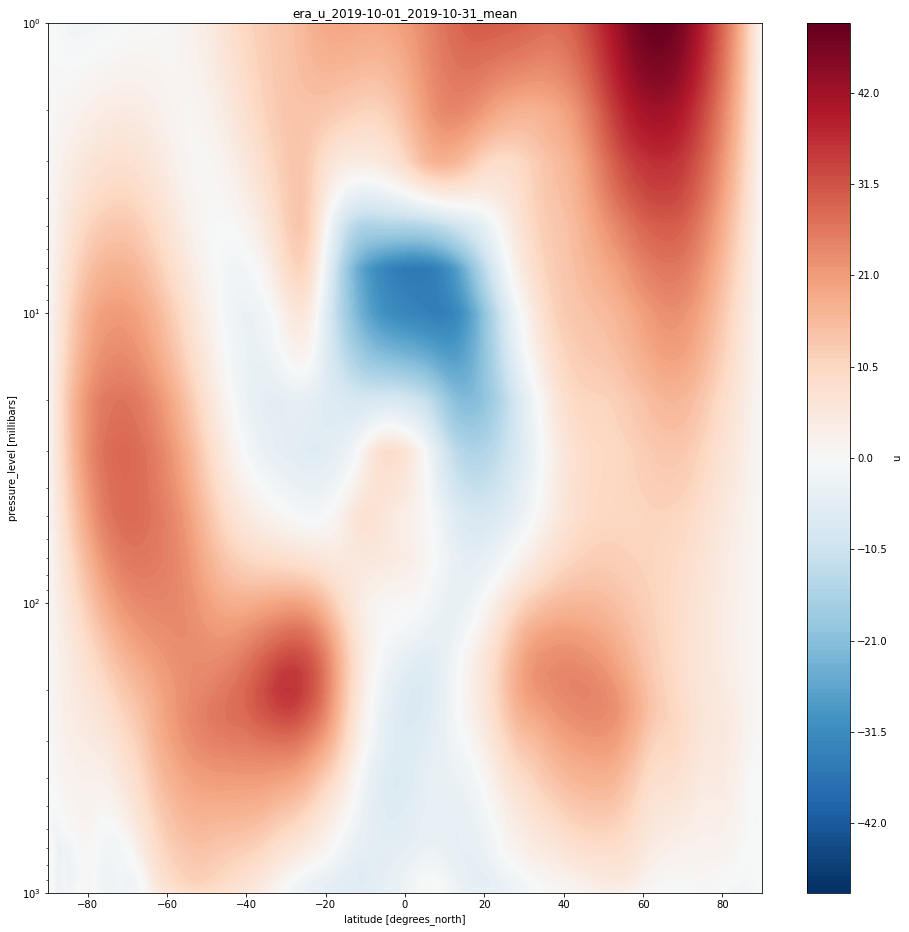

In [32]:
fig_era_u = era_extract('u', '2019-10-01','2019-10-31')